# All the plots - distributions and correlations
In this notebook I'll do all the distributions and the correlation plots to have them at hand while studying the data:
## Distributions

In [1]:
# Importing libraries
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

# For plotting distributions
from benchtools.src.plotools import bkg_sig_hist

In [2]:
# Loading the data for the R&D dataset
# The data is generated on the notebook 01.0-data-exploration.

df = pd.read_csv("..\data\data_exploration_RD.csv")
df.head()

pT_j1        m_j1    eta_j1    phi_j1         E_j1  tau_21_j1  \
0  1286.727685  106.912129  0.185508 -2.763676  1313.290435   0.624659   
1  1354.394070  614.269108  0.826505  1.365524  1943.559886   0.311688   
2  1214.955723  645.865619 -0.196786  2.040545  1396.840654   0.238205   
3  1285.227873  516.835248  0.328693  2.975321  1450.485926   0.013429   
4  1210.415787  129.499352 -0.744836 -2.883347  1567.345300   0.423550   

   nhadrons_j1        pT_j2        m_j2    eta_j2    phi_j2         E_j2  \
0           36  1283.220733   63.164215  0.064989  0.393688  1287.481934   
1           84  1325.613761  439.064150 -0.874319 -1.786248  1916.370744   
2          119  1072.462085  113.768840  0.143831 -1.090330  1089.530630   
3           65  1220.251279  174.796077  0.294854 -0.322661  1285.618789   
4           54  1091.785816  155.362262  1.060534  0.264977  1772.340209   

   tau_21_j2  nhadrons_j2         m_jj  deltaR_j12  n_hadrons  label  
0   0.713248           33  2580.489568    3.159663      109.0    0.0  
1   0.276881           97  3859.315047    3.581406      208.0    0.0  
2   0.726963           59  2480.769725    3.149348      196.0    0.0  
3   0.706361           89  2609.893413    3.298155      183.0    0.0  
4   0.787662           57  3313.488835    3.629229      169.0    1.0

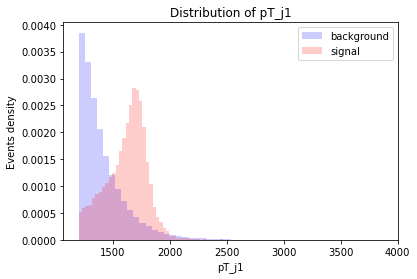

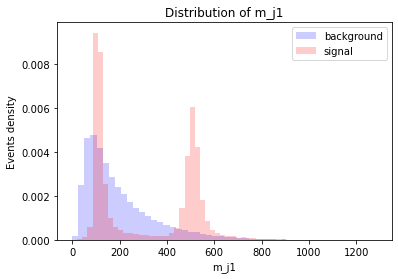

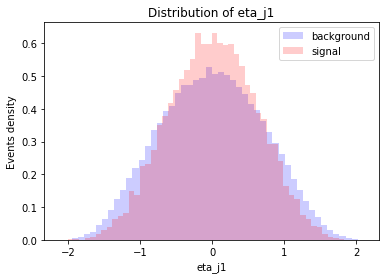

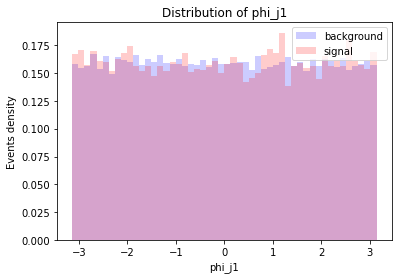

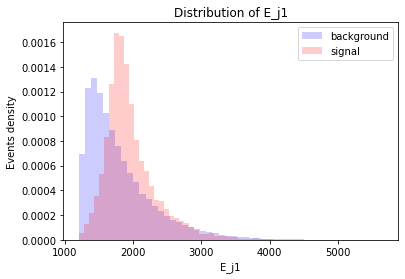

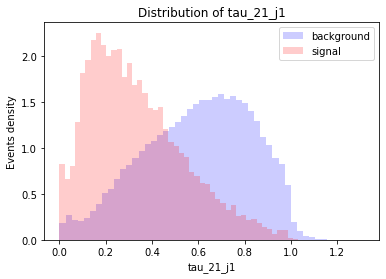

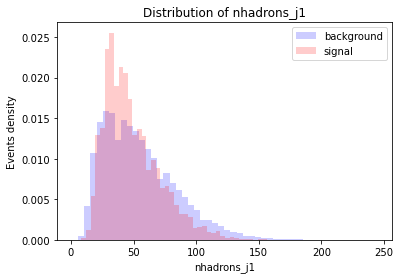

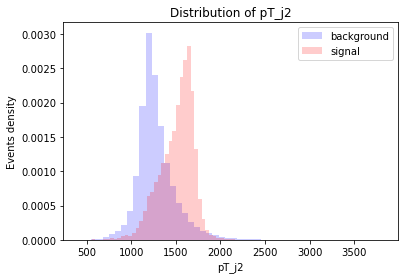

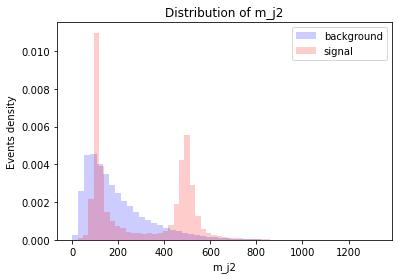

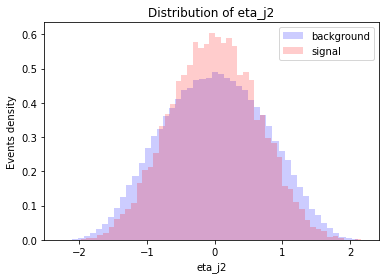

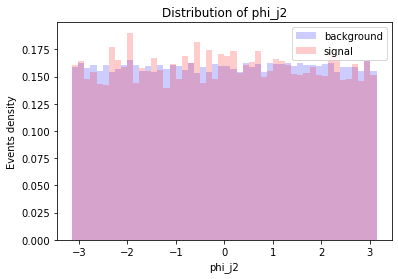

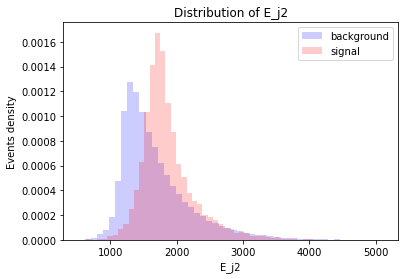

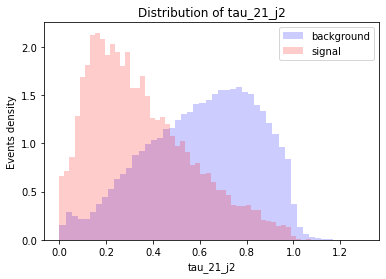

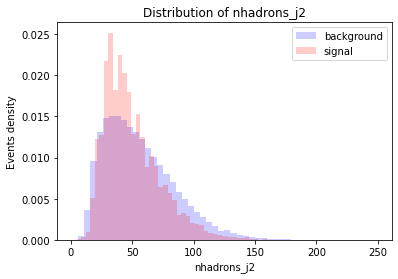

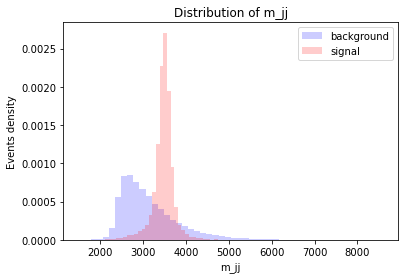

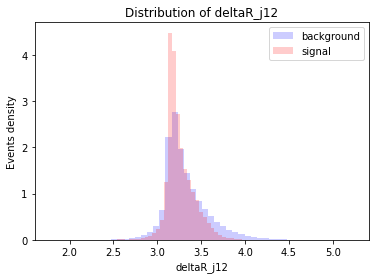

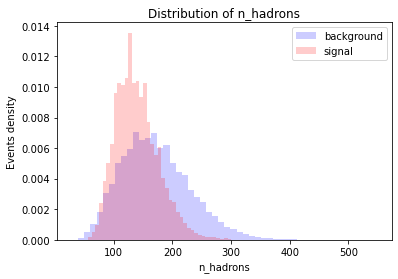

In [3]:
# Plotting all the variables
variables = df.columns.tolist()

for variable in variables[:-1]: 
    # varibles[:-1] to exclude the label variable
    bkg_sig_hist(df, variable=variable, label='label')

## Correlations
From the correlation map we have

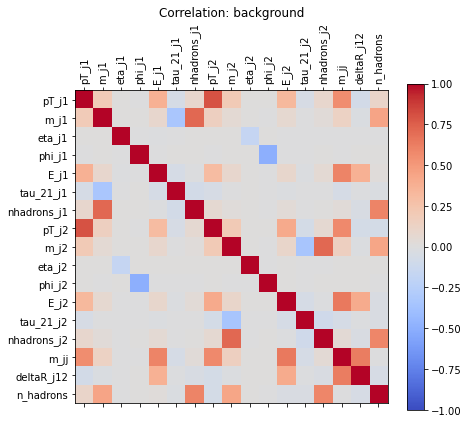

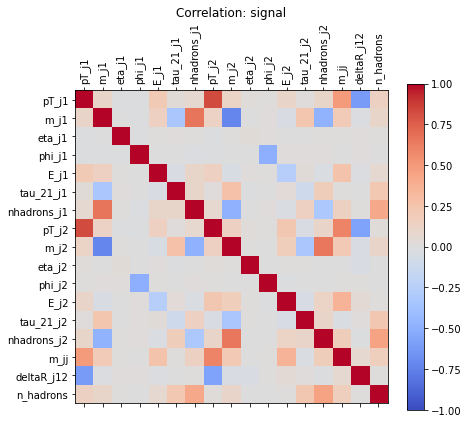

In [4]:
# We want to have the correlations for signal and background in separate dataframes
df_bkg = df[df['label']==0].drop('label', axis=1)
df_sig = df[df['label']==1].drop('label', axis=1)

df_bkg_corr = df_bkg.corr()
df_sig_corr = df_sig.corr()

# To graph the correlation map:
for name, corr in [('background', df_bkg_corr), ('signal', df_sig_corr)]:
    
    # Define the figure and size
    fig = plt.figure(figsize=[7,6])
    
    # Plot axis
    ax = fig.add_subplot(111)
    
    # Color bar for the mapping
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    
    # Axis
    ticks = np.arange(0,len(corr.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)
    
    # Title
    plt.title('Correlation: {}'.format(name))
    plt.show()

Plotting all the correlations:

C:\Users\maria\anaconda3\lib\site-packages\benchtools\src\plotools.py:86: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=[12, 4])


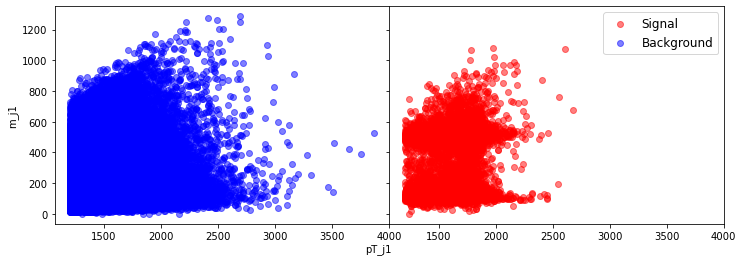

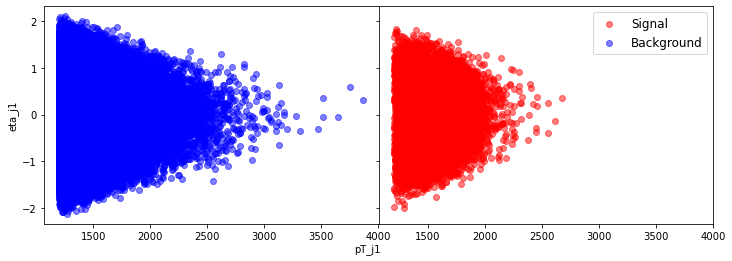

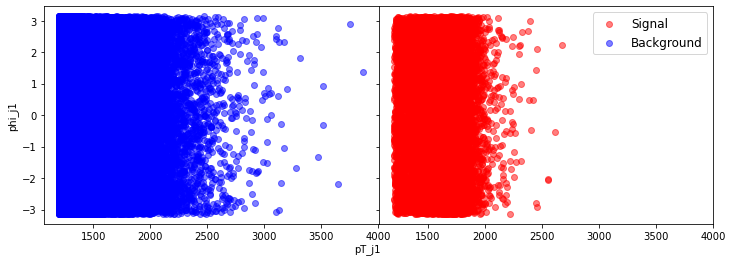

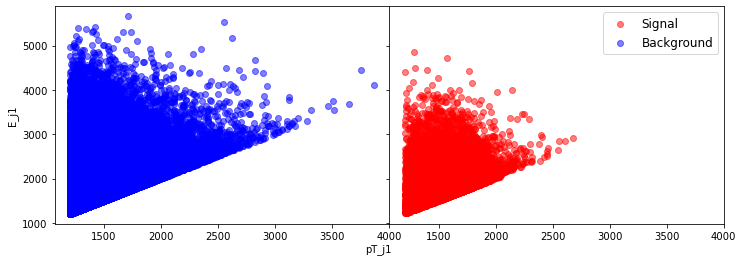

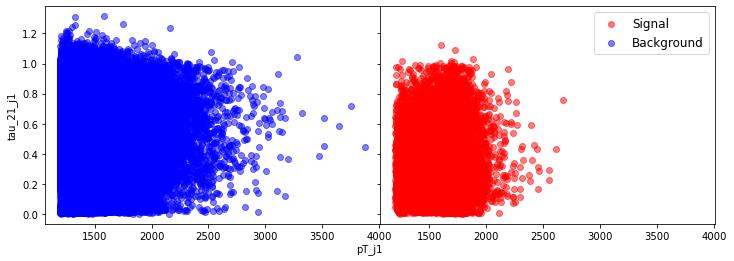

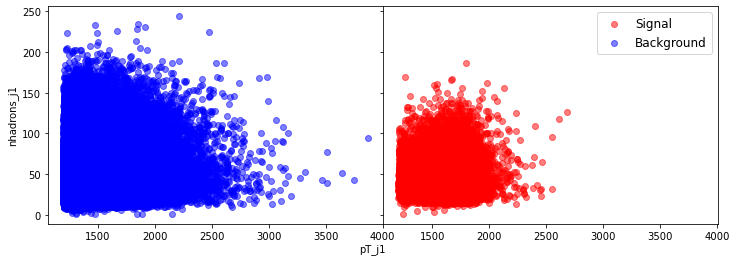

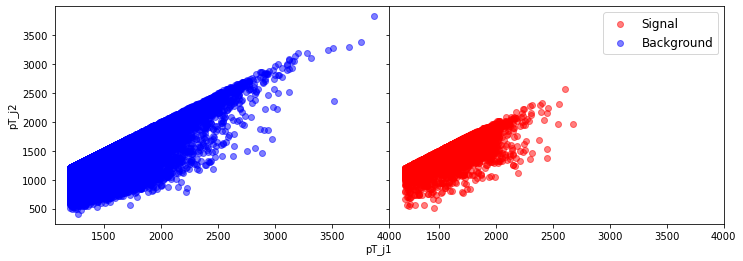

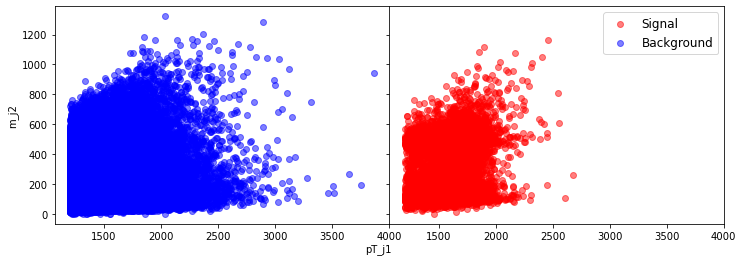

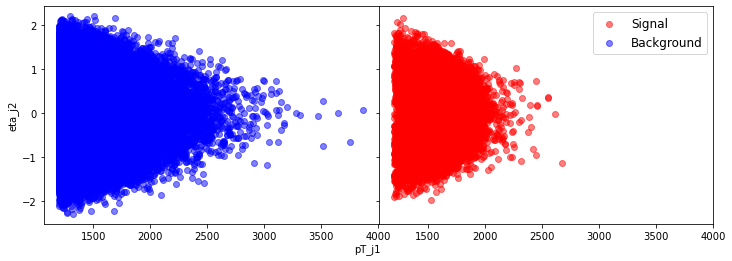

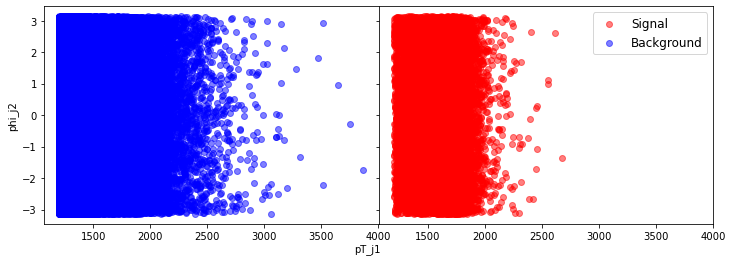

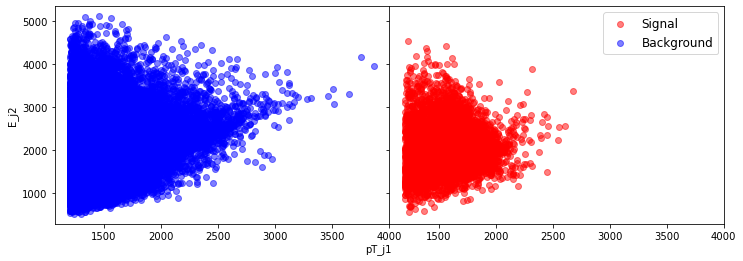

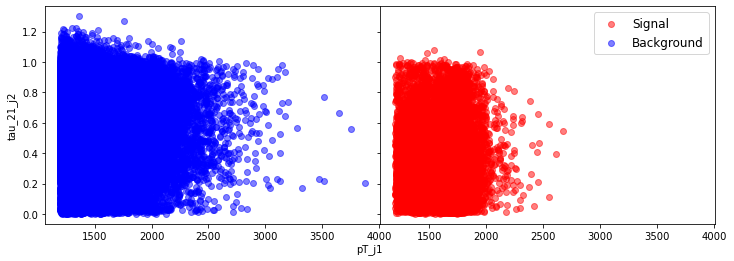

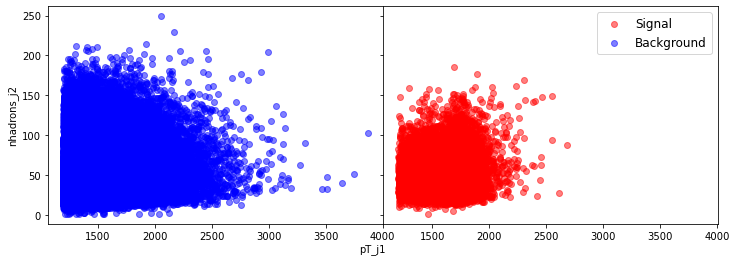

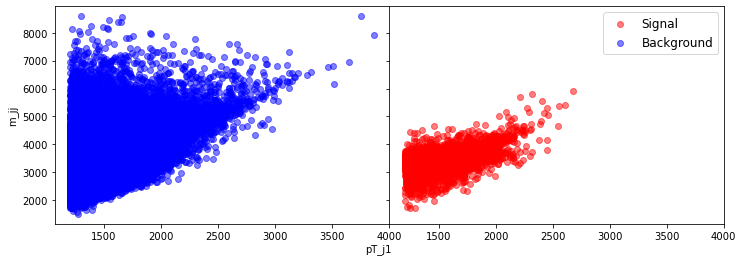

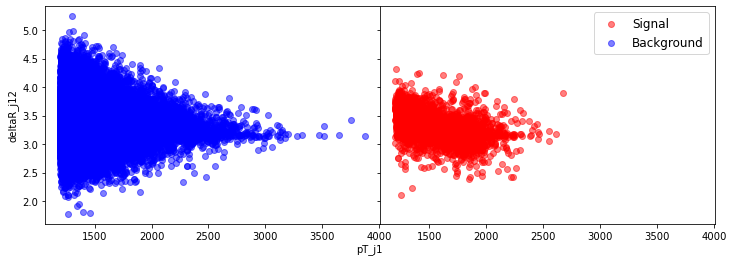

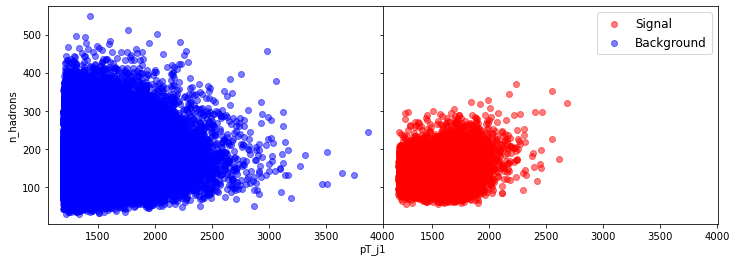

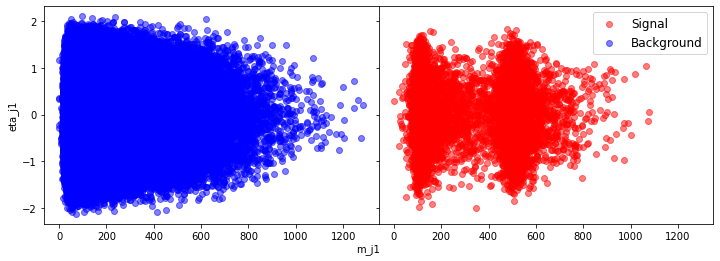

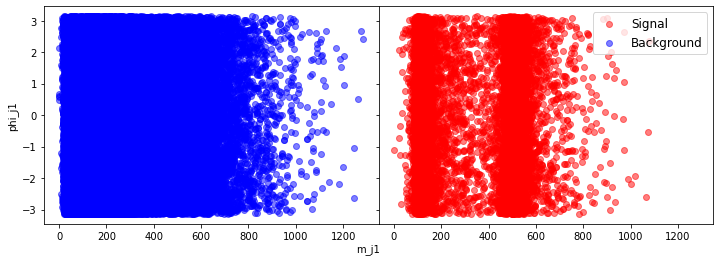

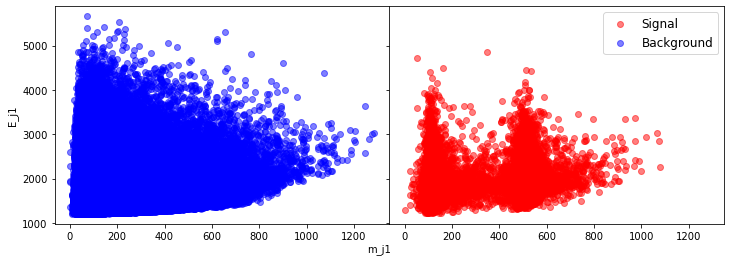

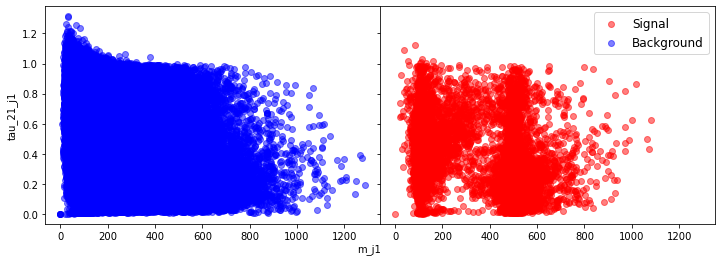

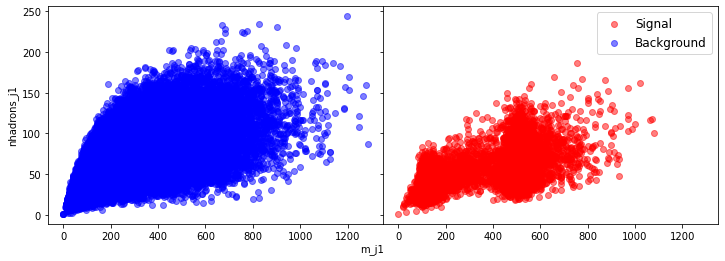

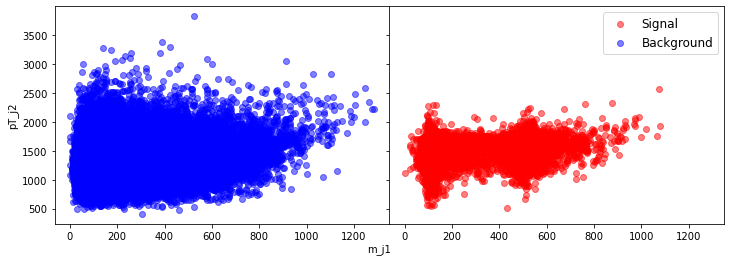

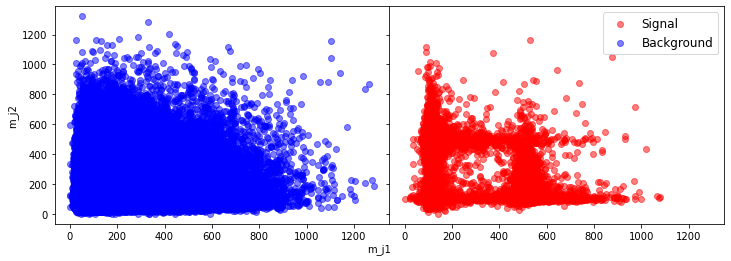

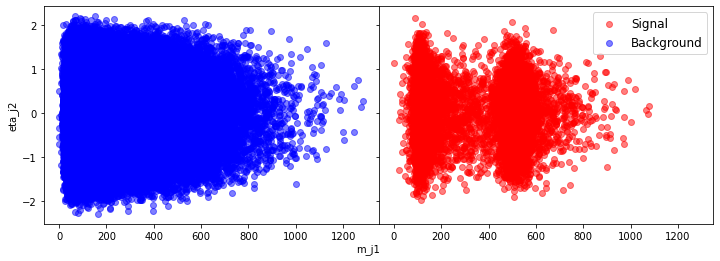

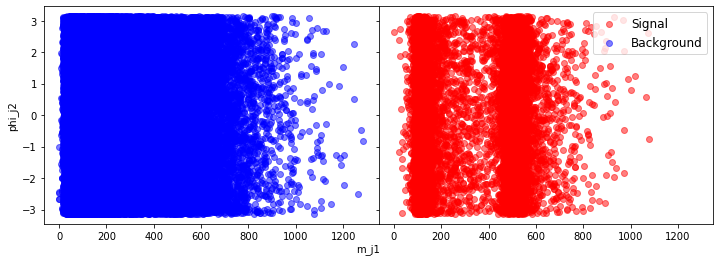

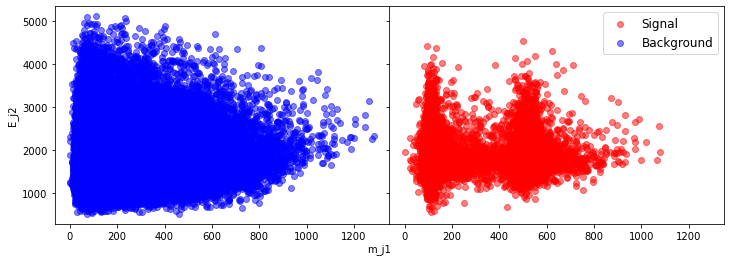

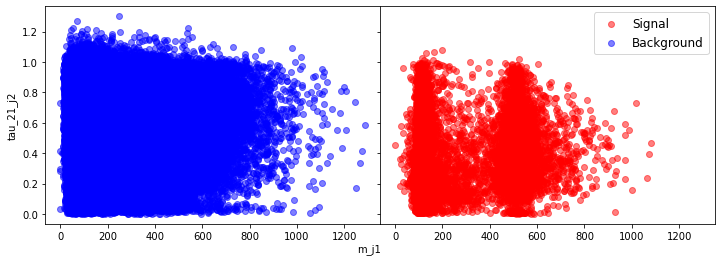

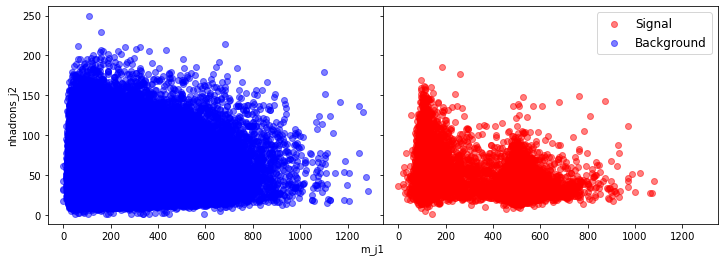

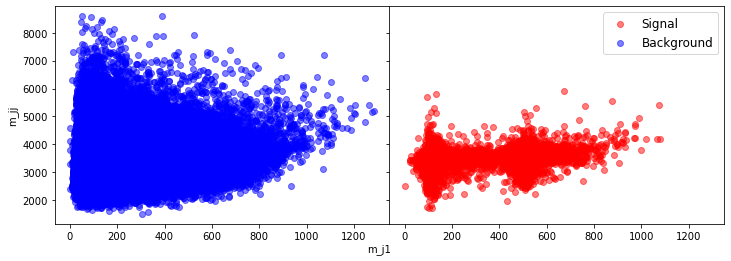

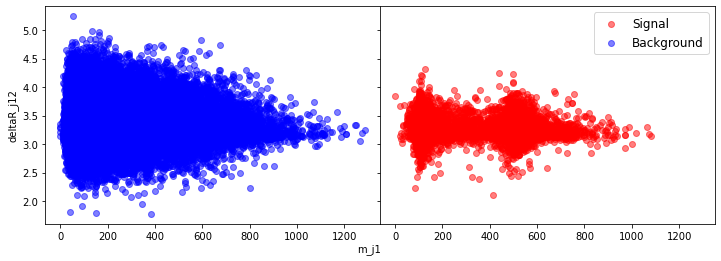

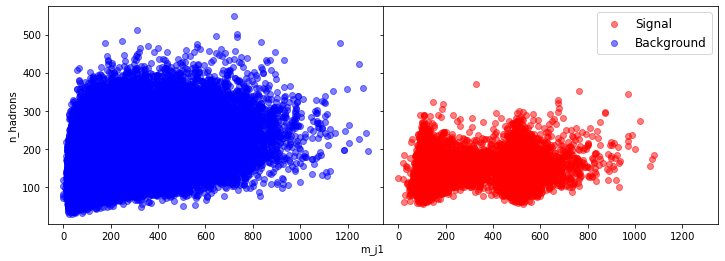

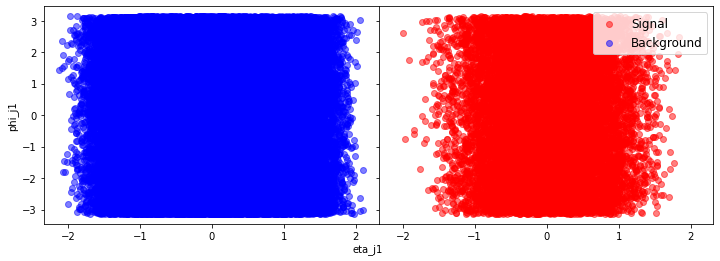

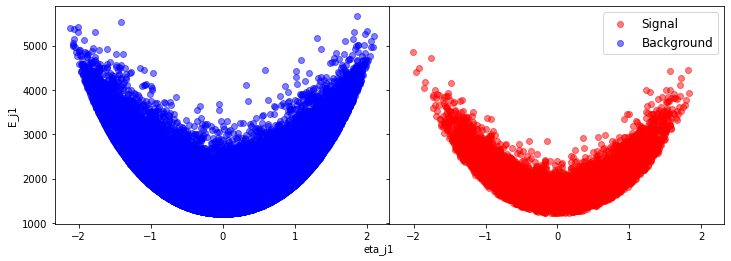

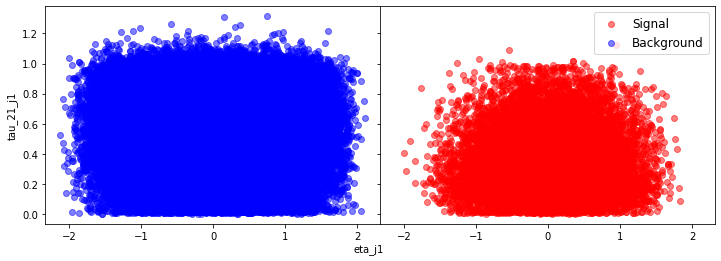

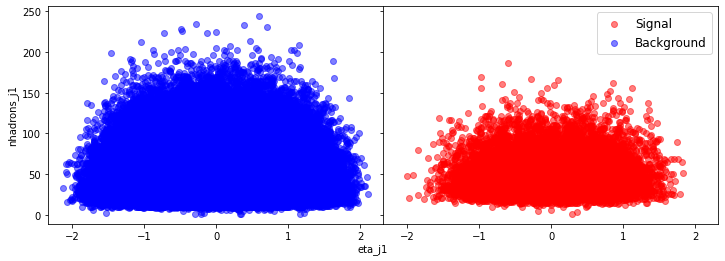

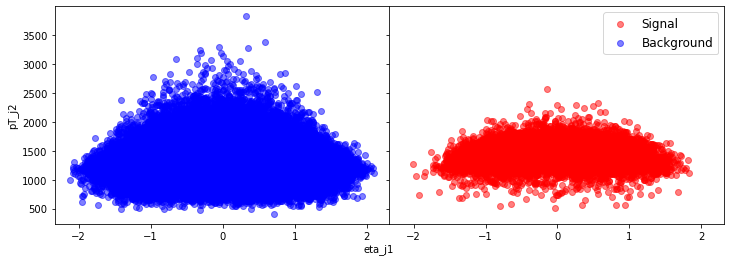

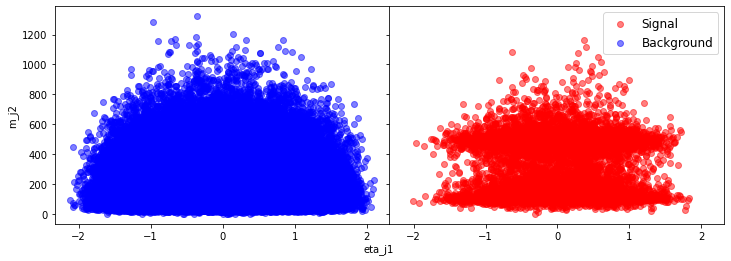

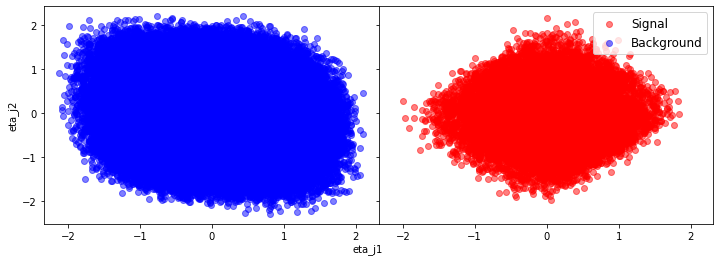

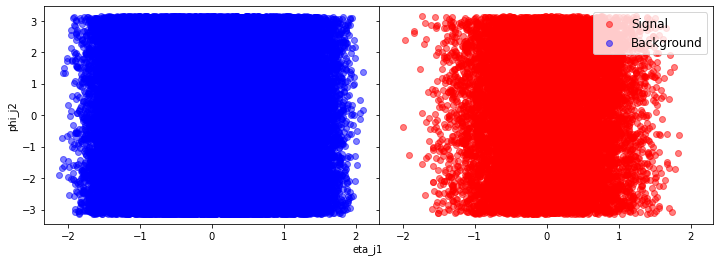

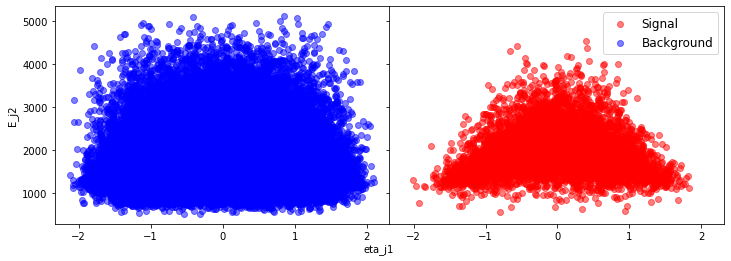

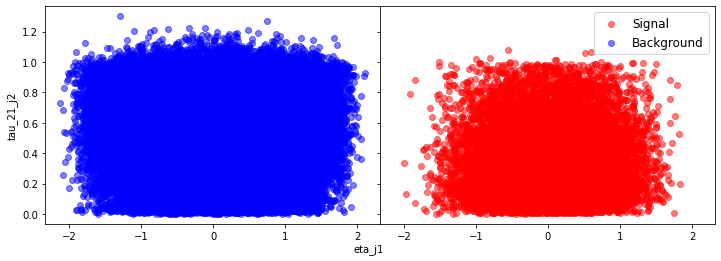

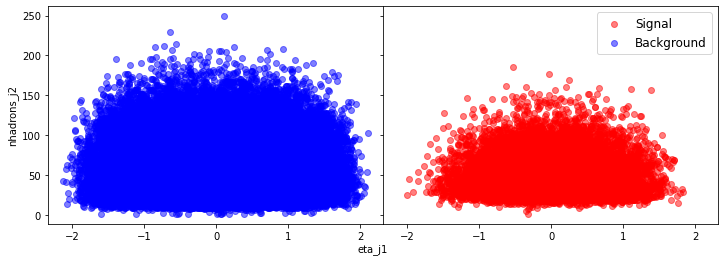

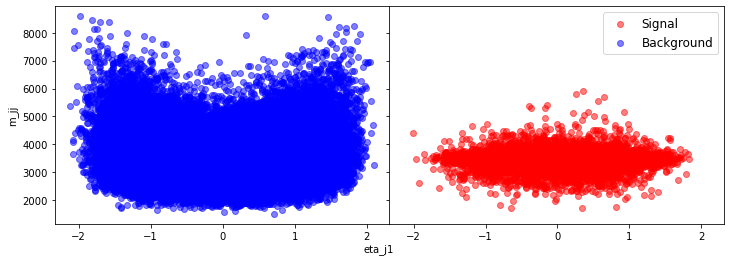

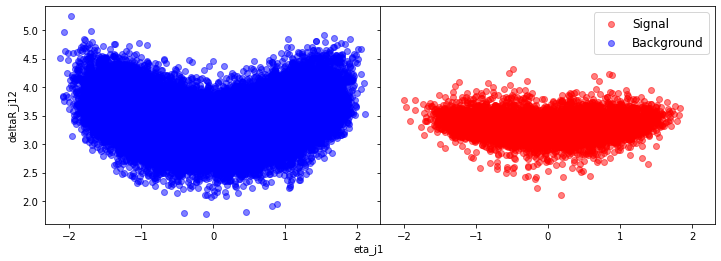

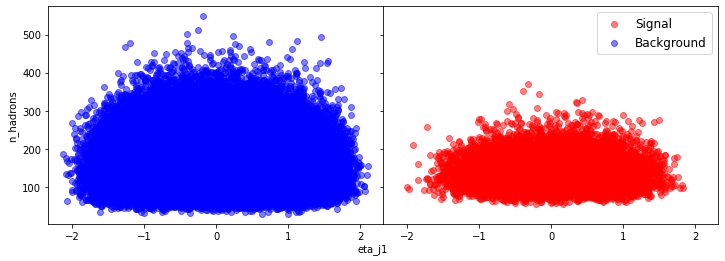

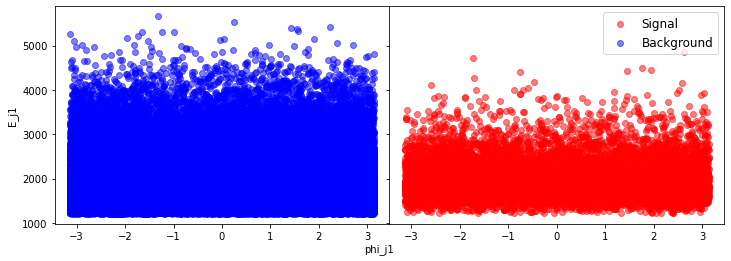

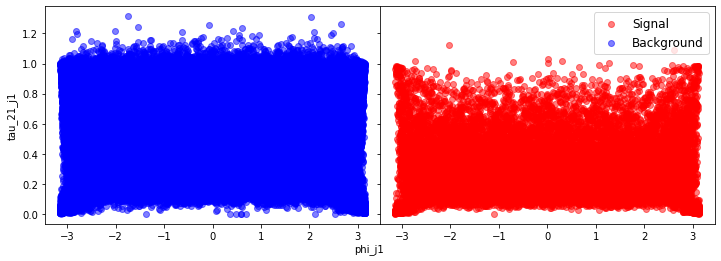

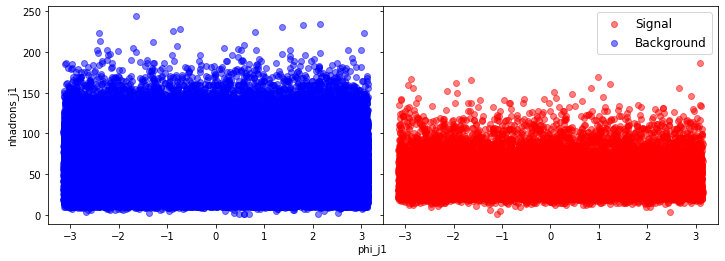

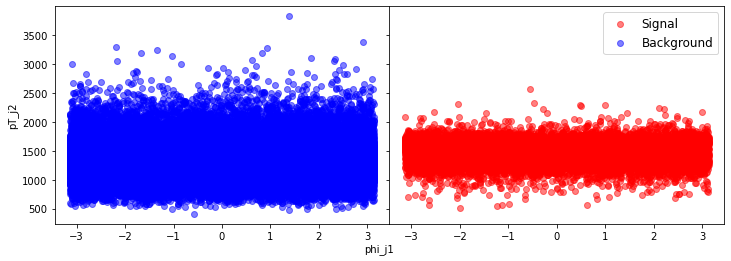

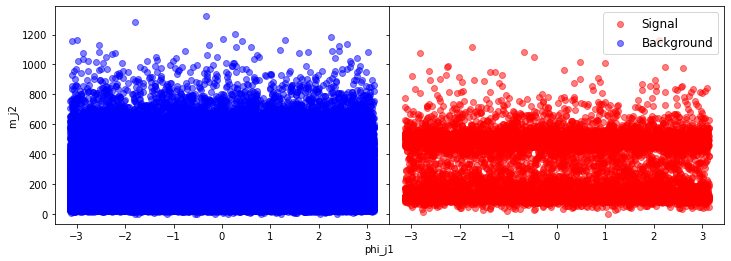

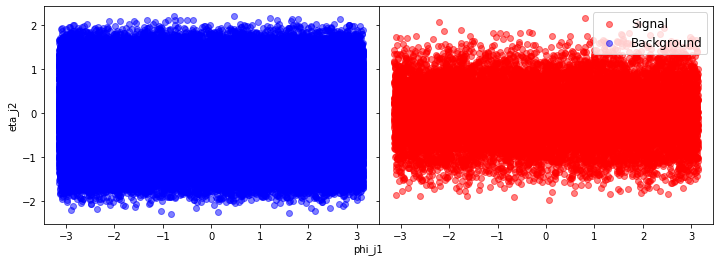

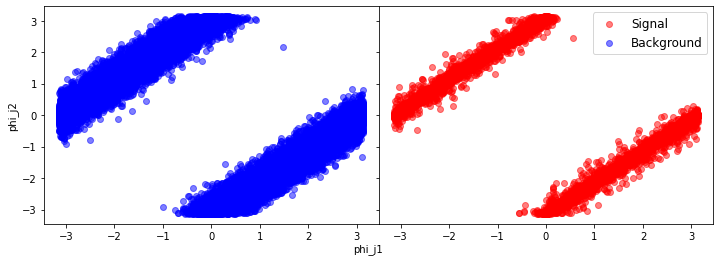

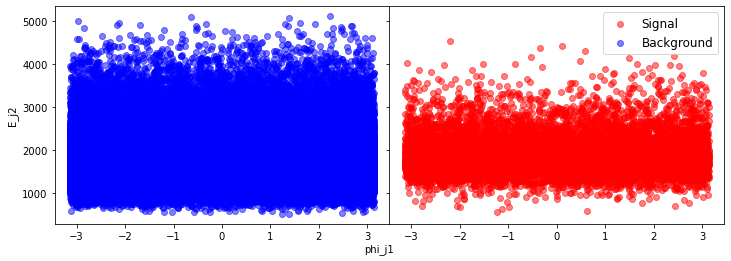

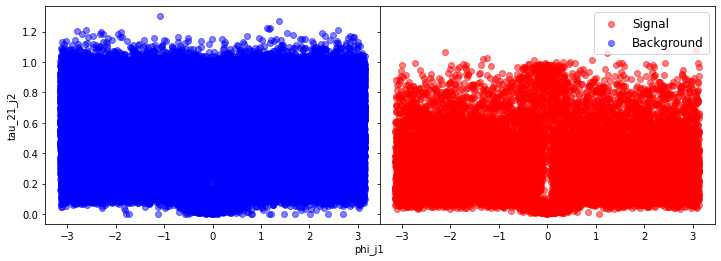

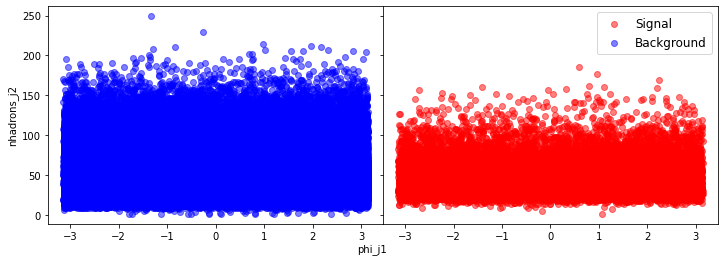

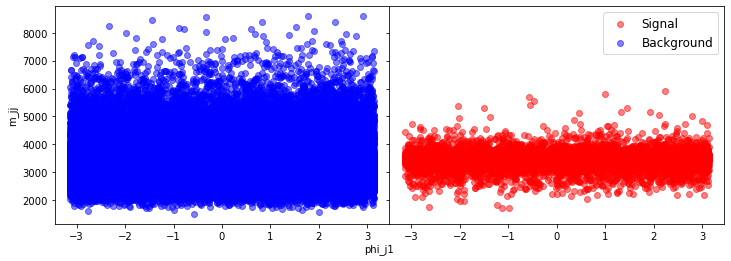

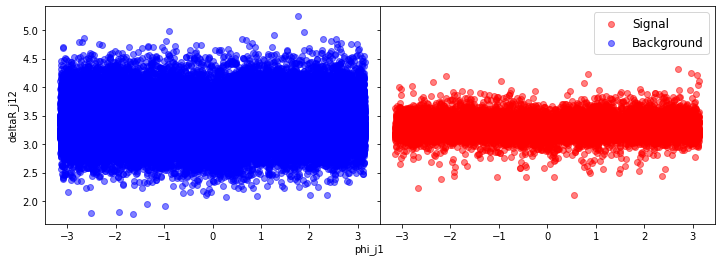

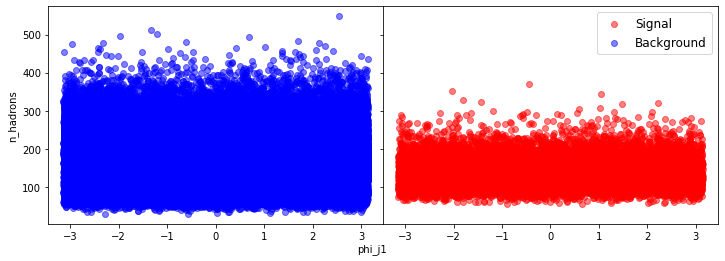

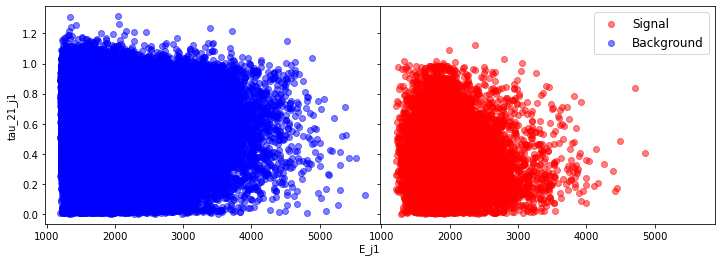

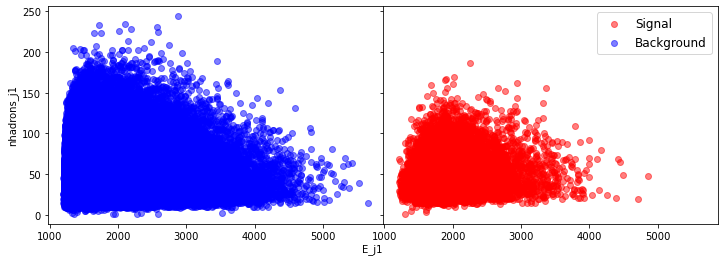

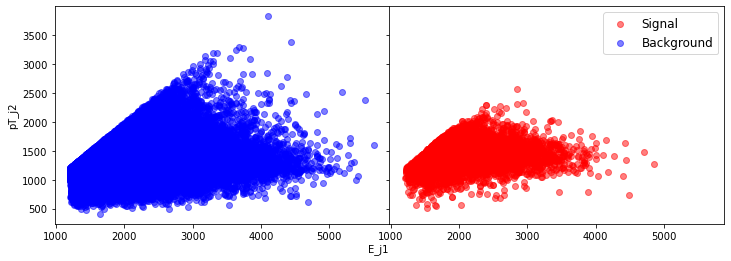

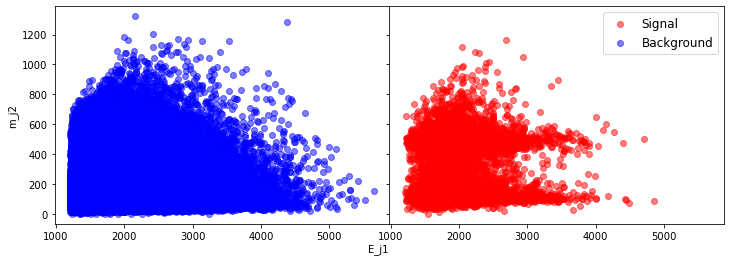

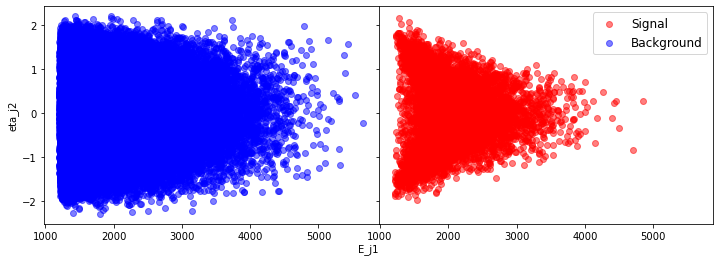

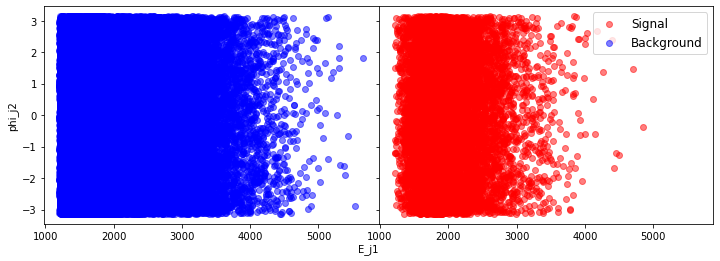

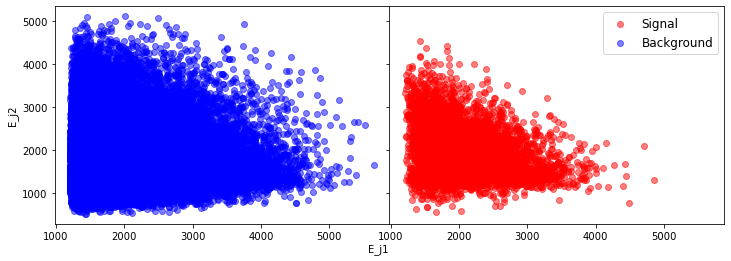

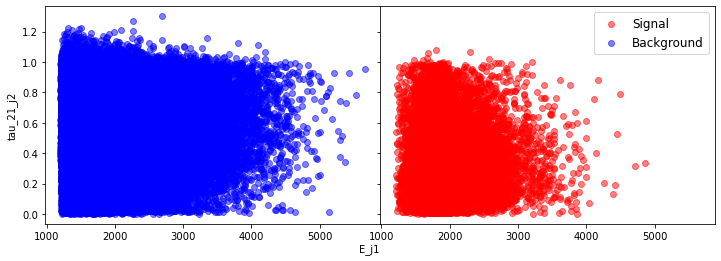

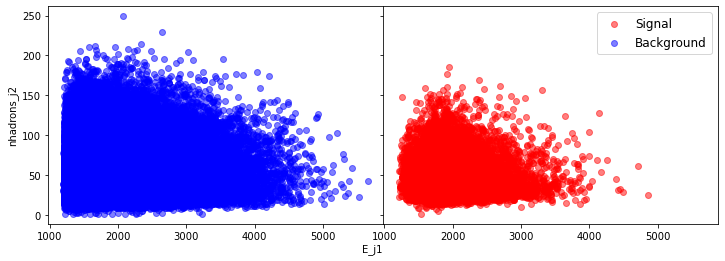

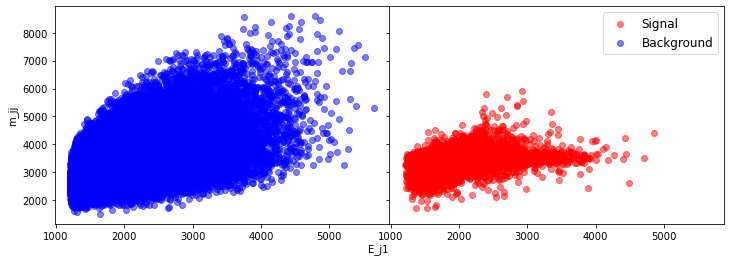

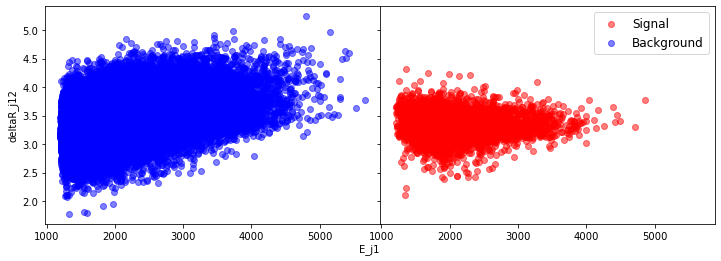

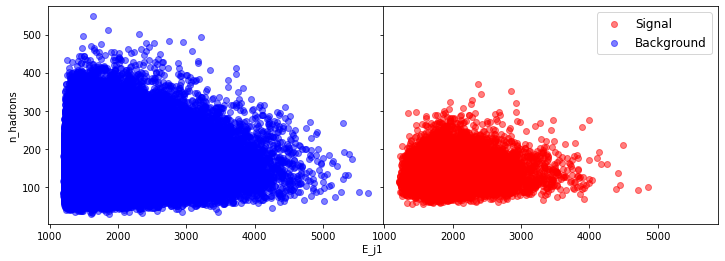

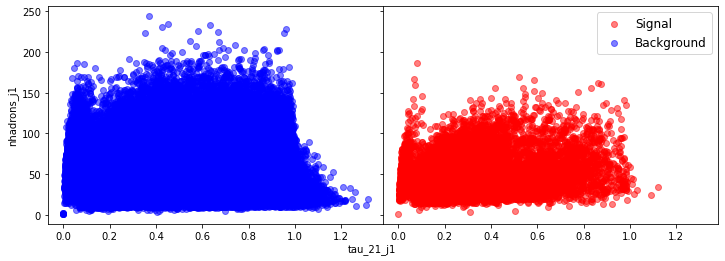

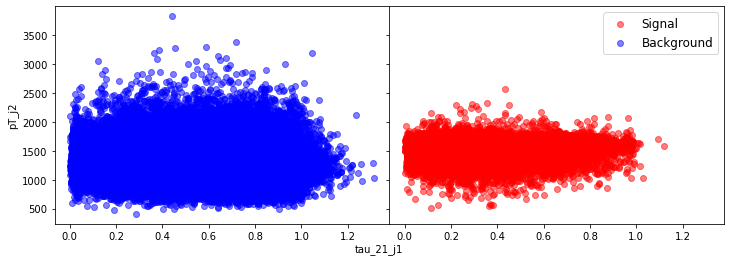

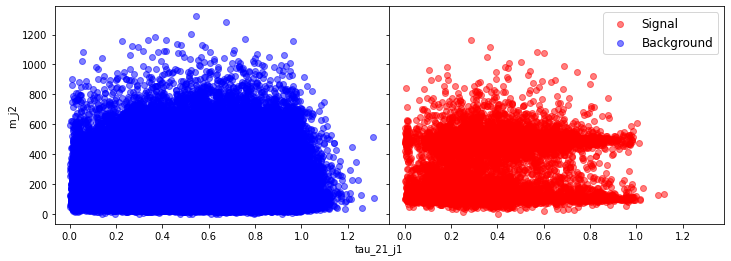

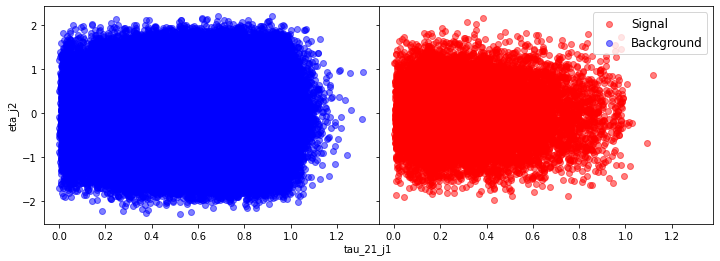

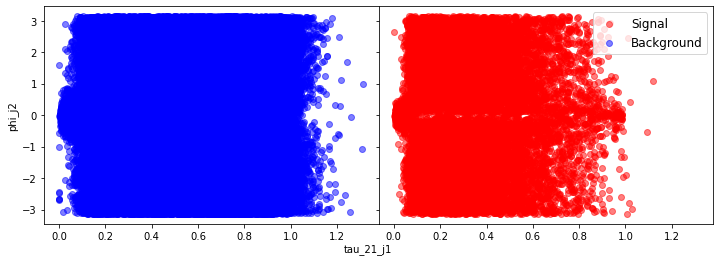

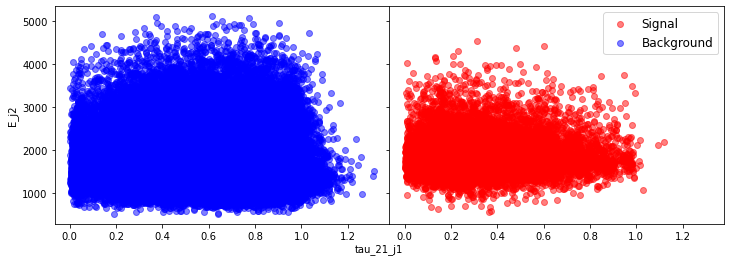

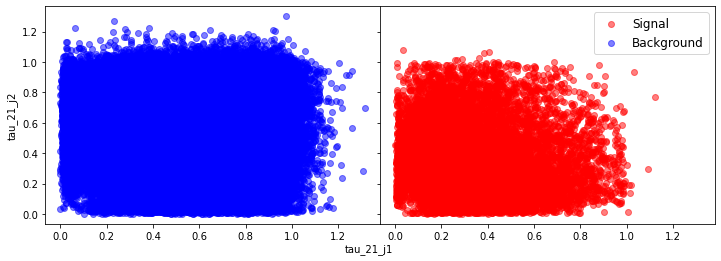

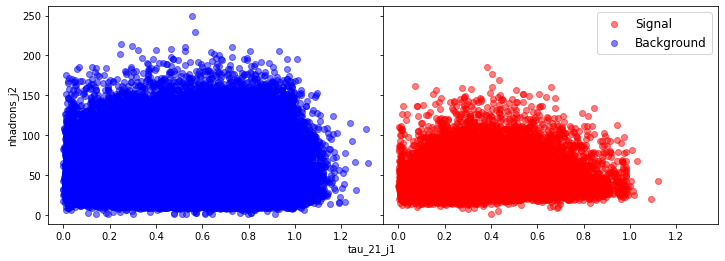

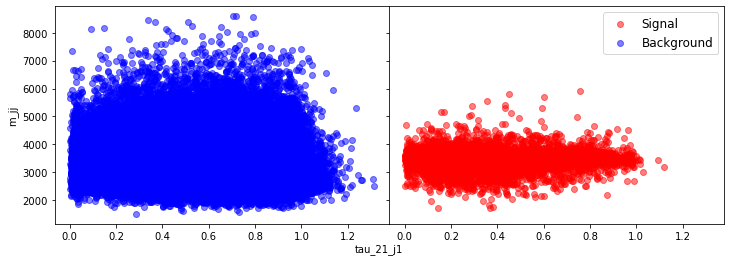

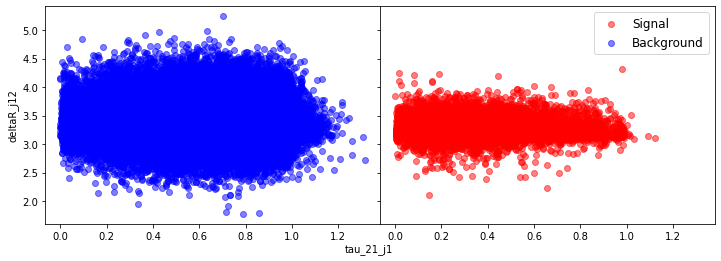

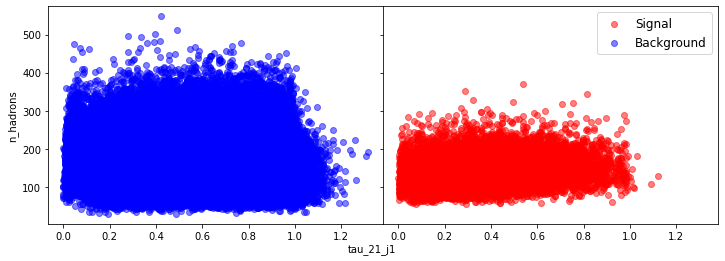

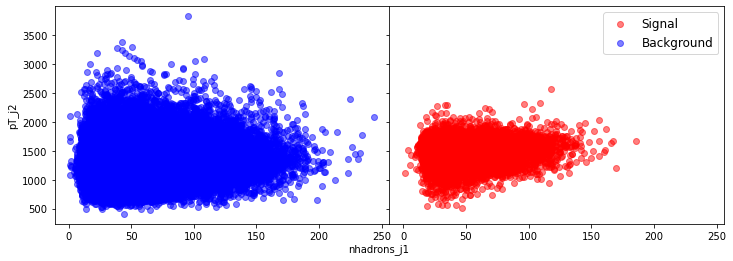

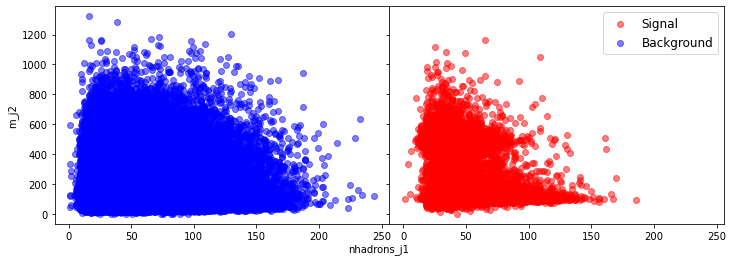

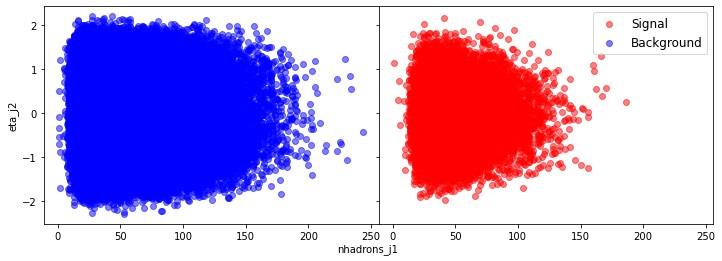

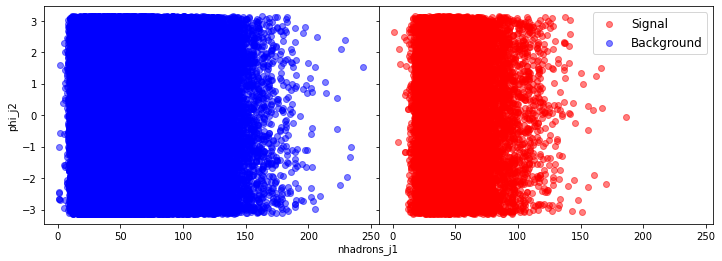

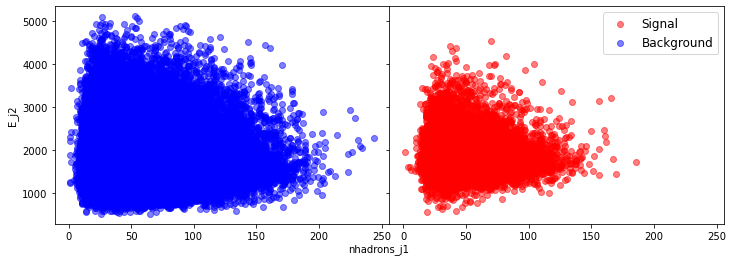

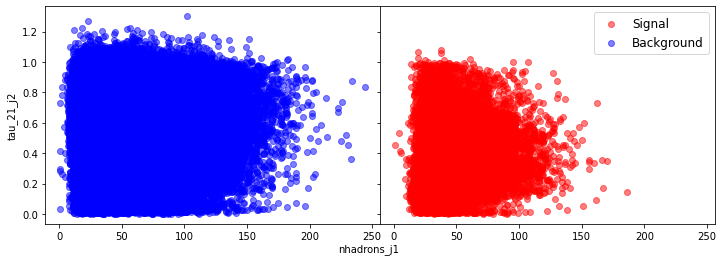

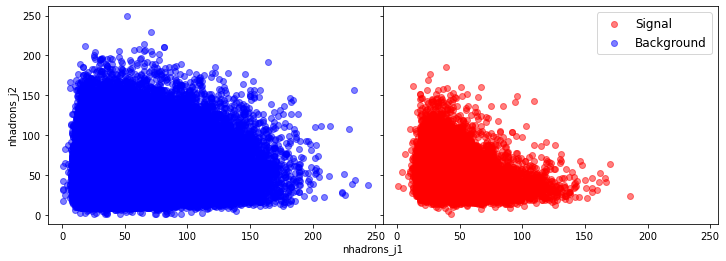

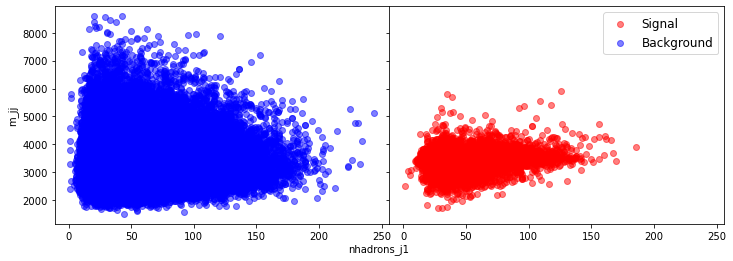

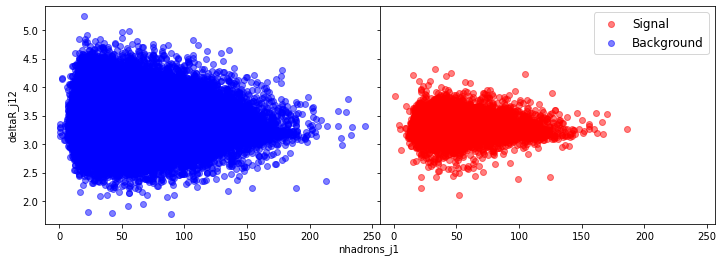

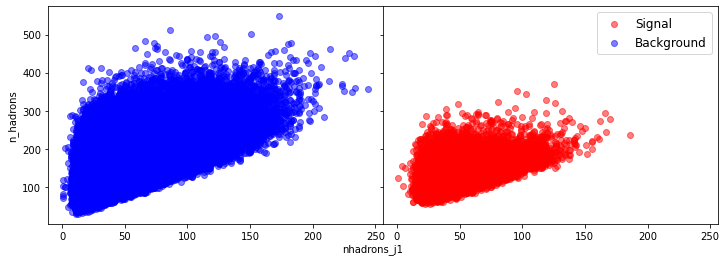

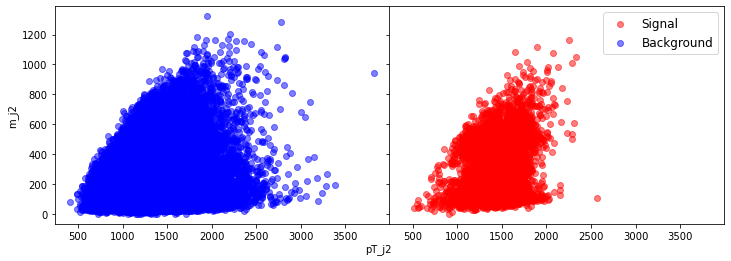

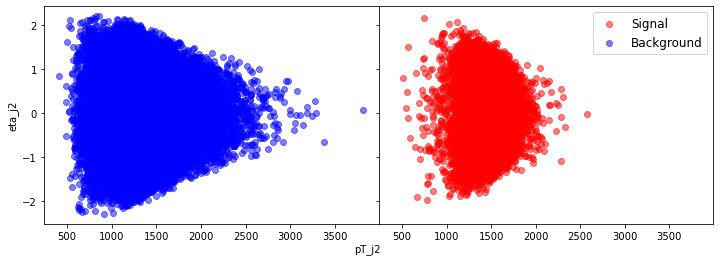

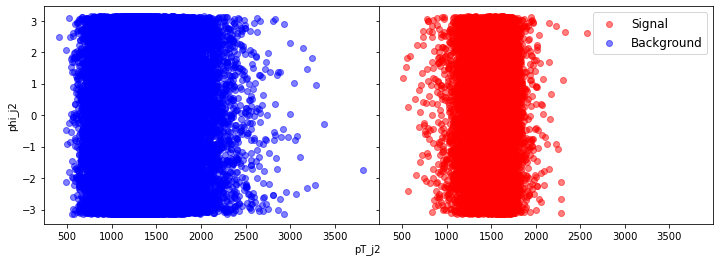

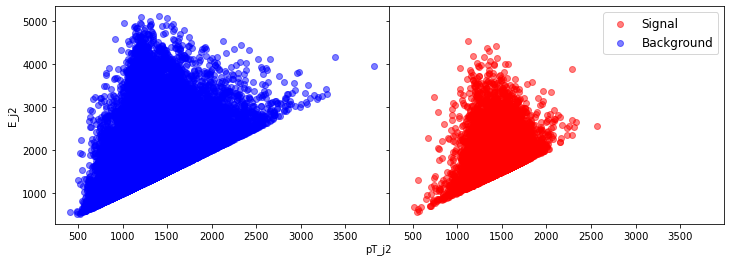

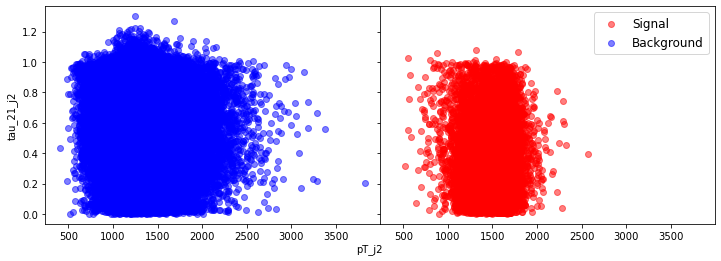

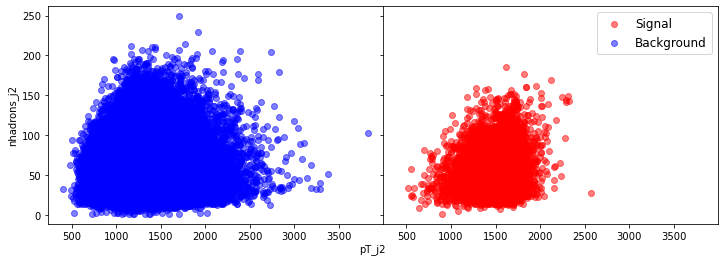

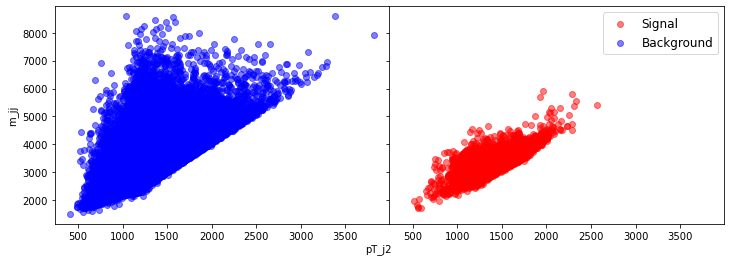

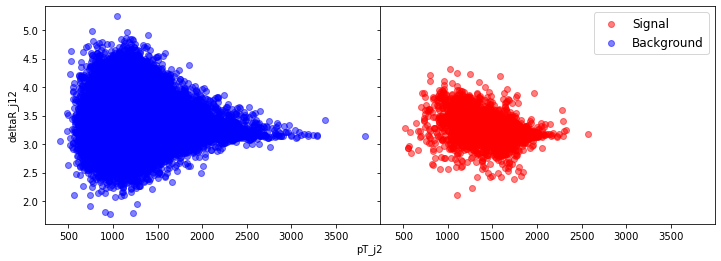

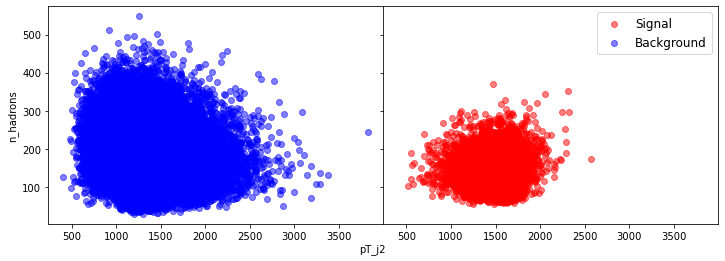

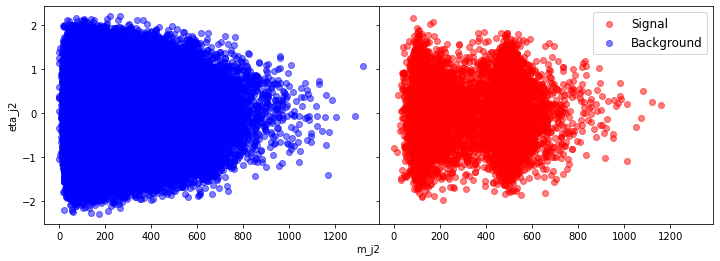

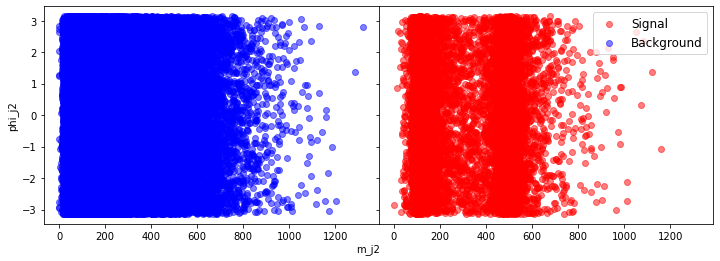

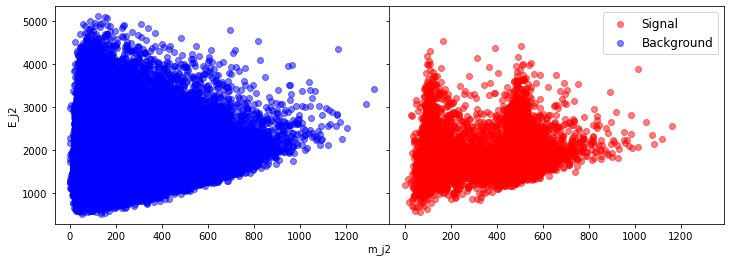

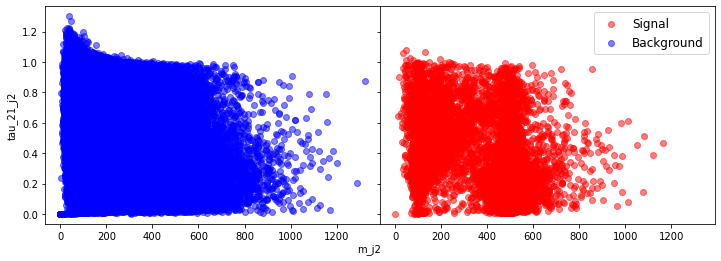

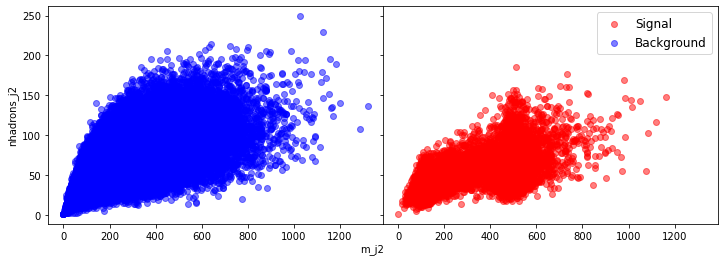

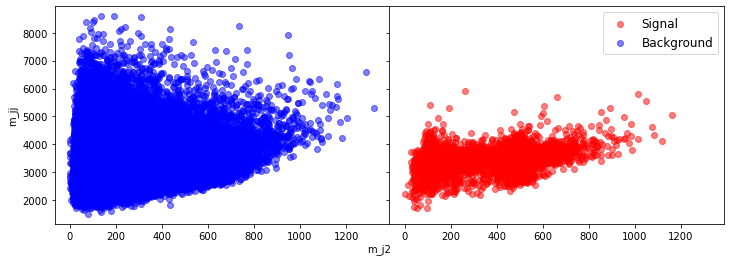

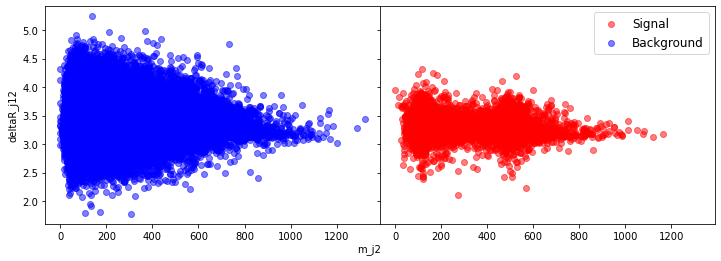

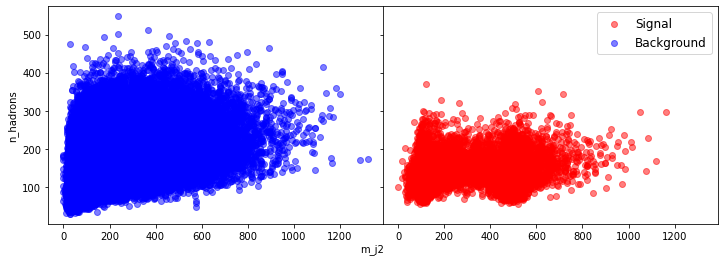

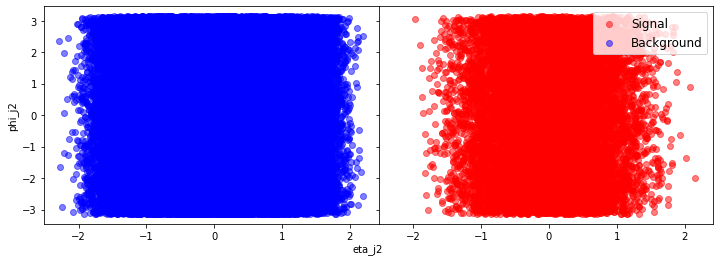

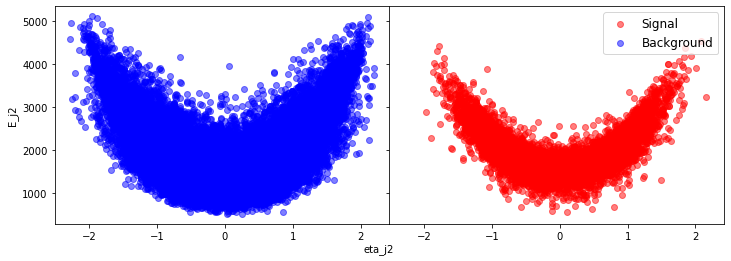

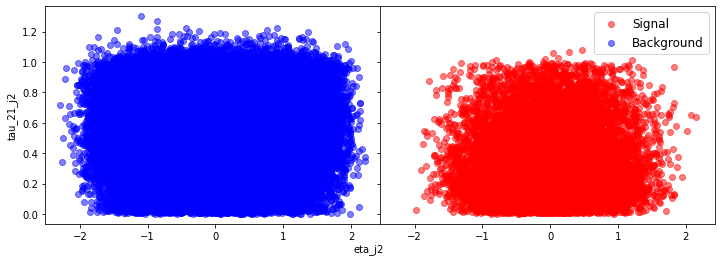

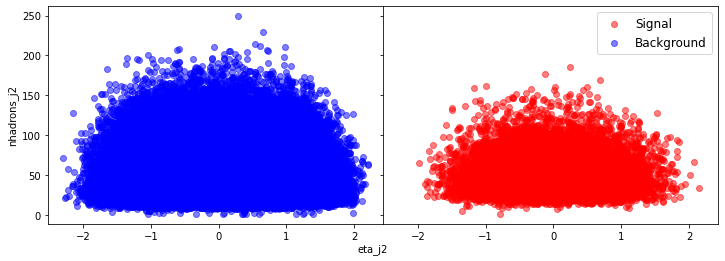

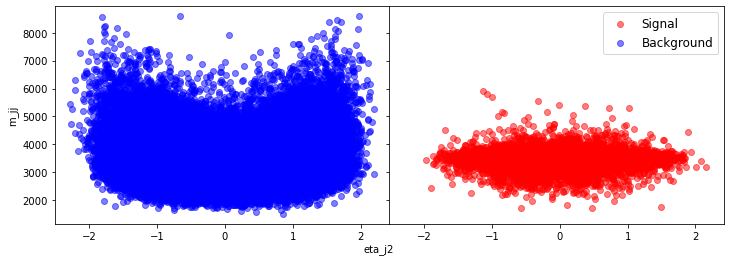

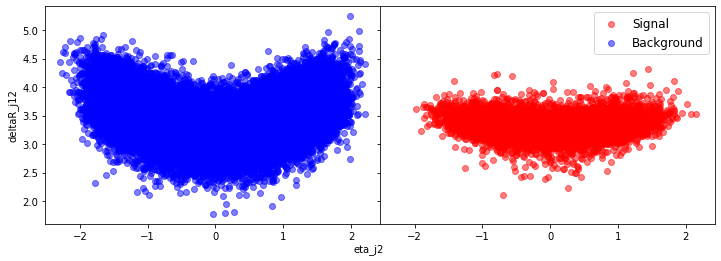

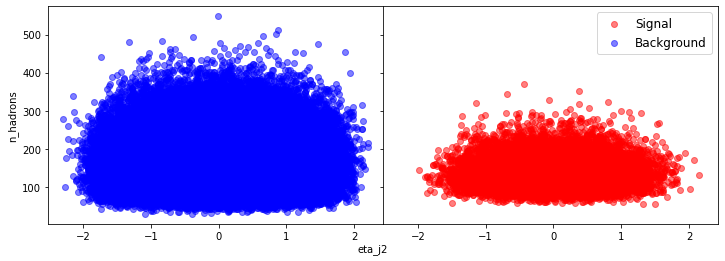

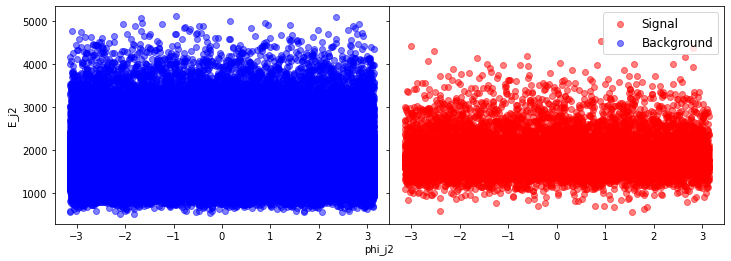

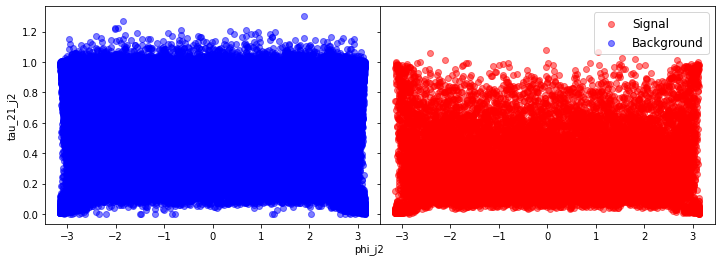

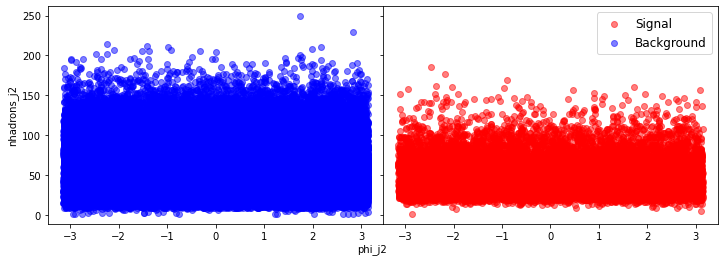

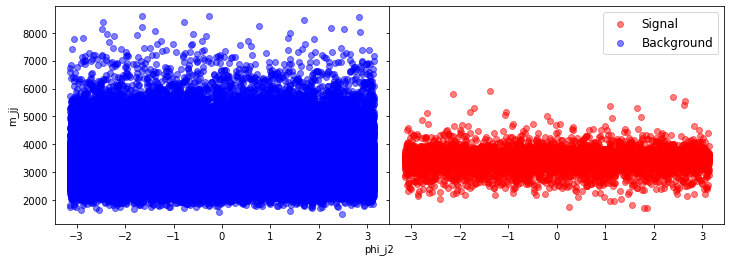

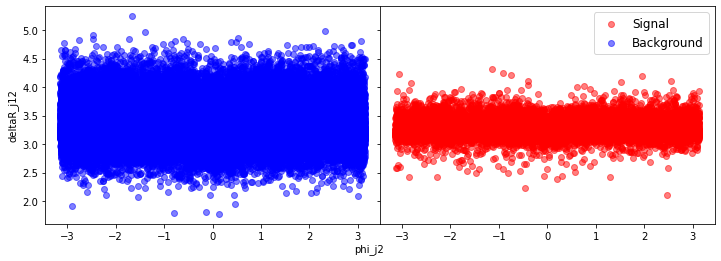

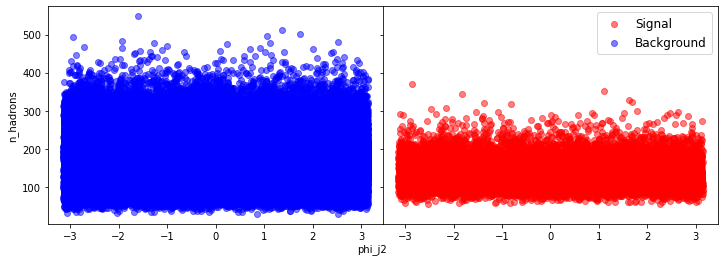

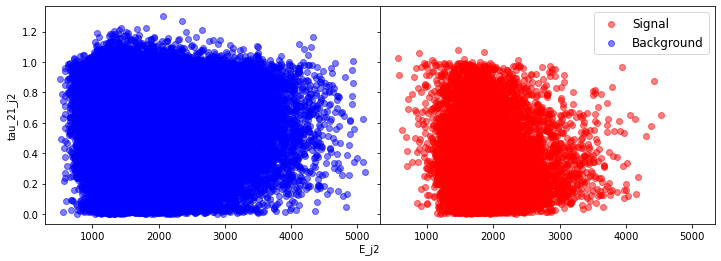

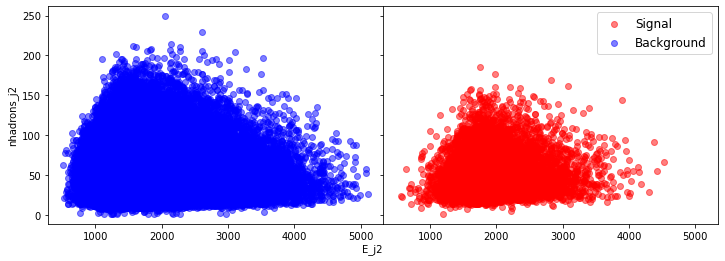

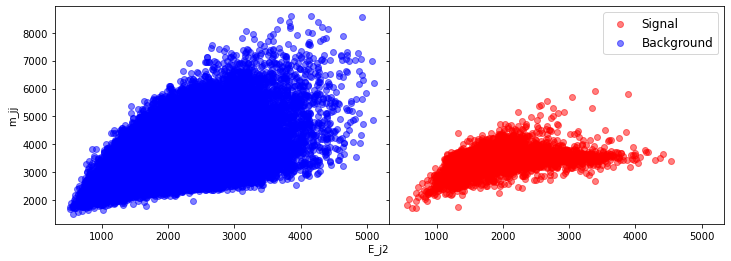

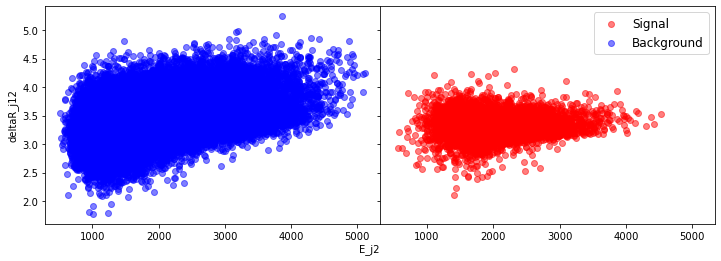

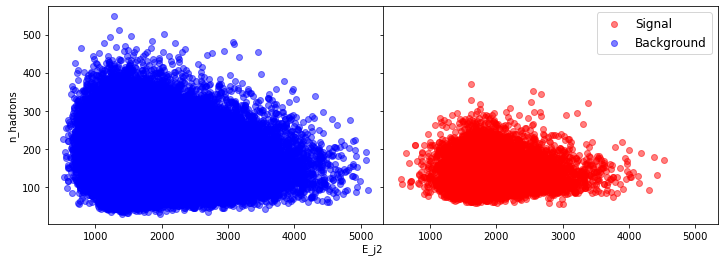

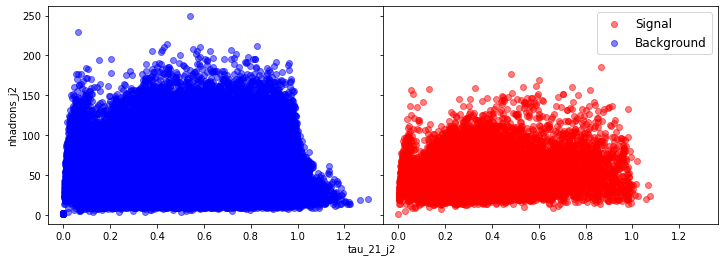

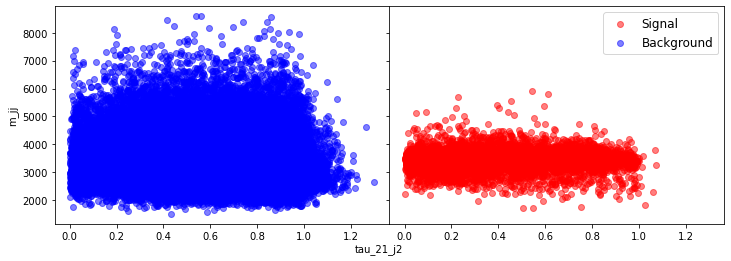

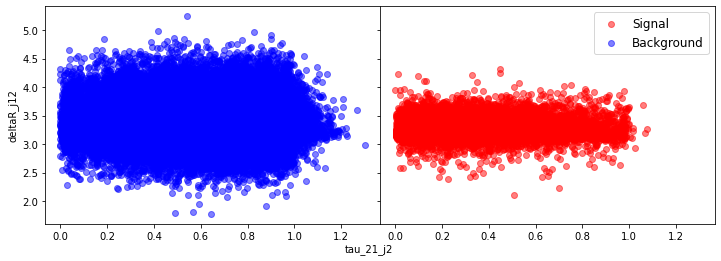

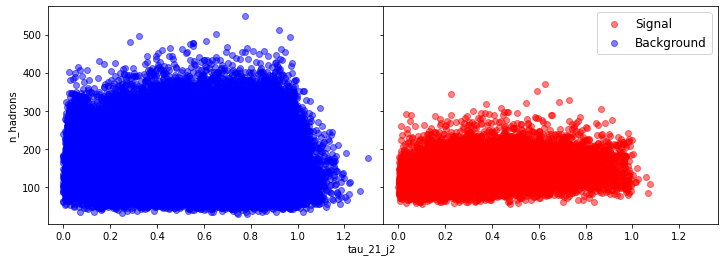

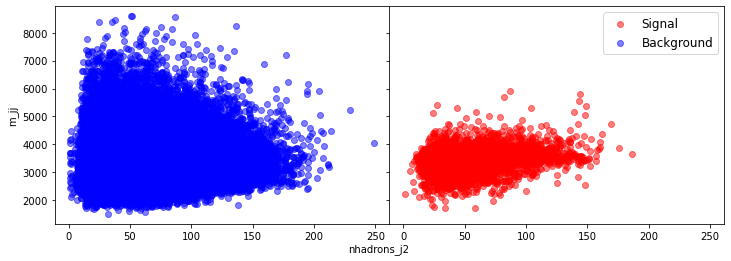

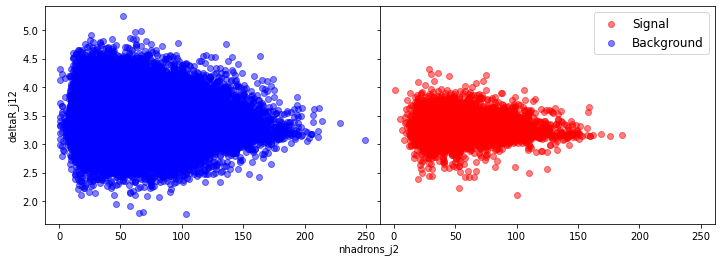

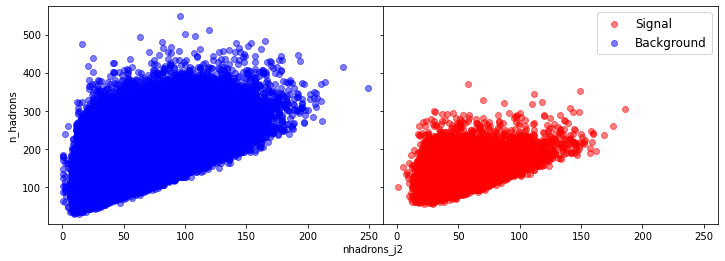

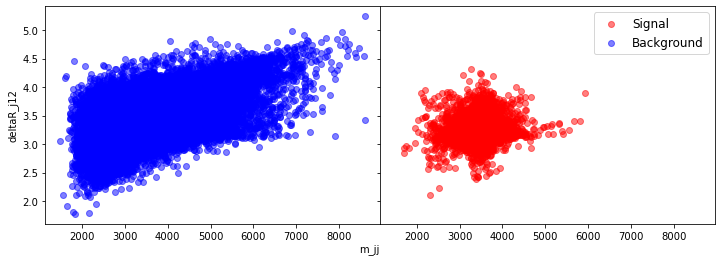

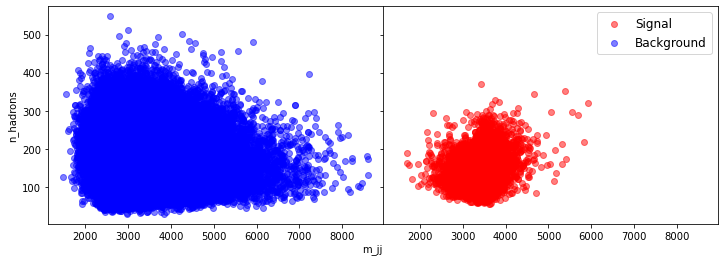

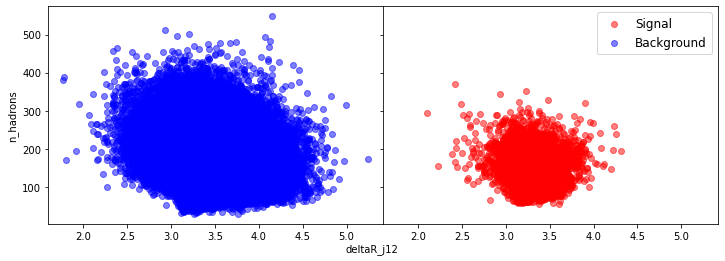

In [5]:
from benchtools.src.plotools import bkg_sig_scatter

# Getting the variables for the axis
xlist = df.drop('label', axis=1).columns.tolist()
ylist = xlist.copy()

# Iterating over variables for x-axis
for x in xlist:
    # Removing them for the y-axis variables list
    ylist.remove(x)
    # Iterating over variables for y-axis
    for y in ylist:
        bkg_sig_scatter(df, x, y)